# **PRÁCTICA 2**

1) Leer y representar la imagen gray_bands.tif
2) Detectar y representar los bordes con un operador de gradiente
3) Detectar y representar los bordes con el operador de laplaciana
4) Añadir ruido gaussiano a la imagen, de media cero y de desviación típica configurable por el usuario. Representar las imágenes
5) Aplicar los operadores de gradiente y laplaciana a las imágenes ruidosas. ¿Podemos detectar los bordes? Discutir el resultado
6) Aplicar un filtrado Gaussiano a la imagen antes de aplicar los operadores anteriores. ¿Podemos ahora detectar los bordes? Discutir el resultado
7) La detección de bordes se resuelve con métodos que se fundamentan en lo visto en los apartados anteriores. Un algoritmo muy conocido es el detector de Canny, que se ha presentado en clase. Aplicarlo a las dos imágenes reales (building.tif y head_CT.tif). Discutir el resultado y los parámetros empleados

In [46]:
from PIL import Image
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skimage import data, util, exposure, color

from skimage.morphology import (square, rectangle, diamond, disk, cube,
                                octahedron, ball, octagon, star,
                                binary_erosion, binary_dilation, binary_opening, binary_closing,
                               remove_small_holes, label, convex_hull_image, skeletonize, thin, reconstruction,
                               opening, closing, dilation, erosion)

from skimage import data
from skimage.util import invert
from skimage import filters
from skimage.data import camera
from skimage.util import random_noise
from skimage import feature

from scipy.ndimage import convolve, correlate, uniform_filter, gaussian_filter, median_filter, rotate
from scipy.ndimage import prewitt, sobel, laplace


## 1.Leer y representar la imagen

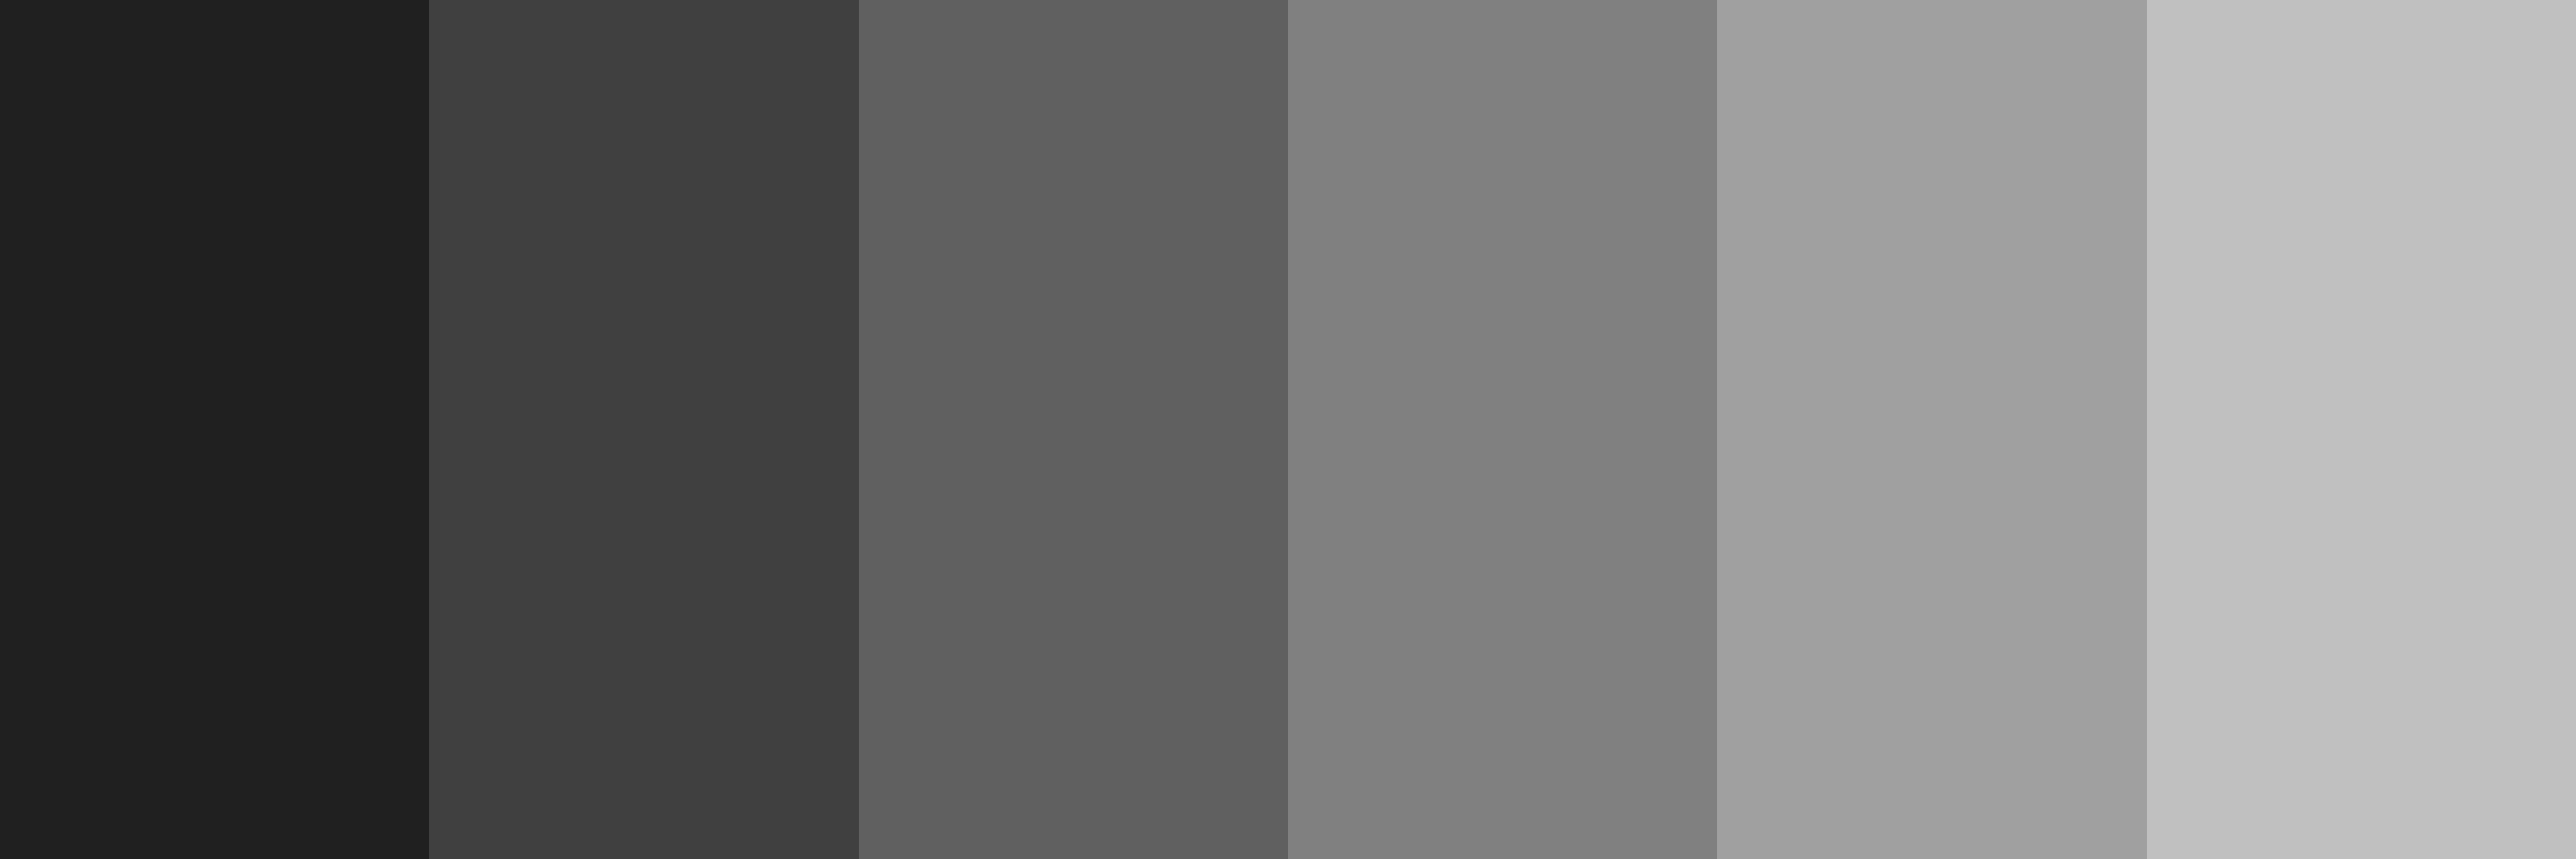

In [47]:
file = 'images/gray_bands.tif'

img_gray = Image.open(file)
display(img_gray)

formato: TIFF
(ancho, alto) = (7200, 2400)
modo:  L


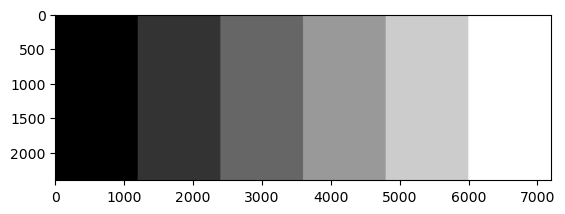

In [48]:
print('formato:', img_gray.format)
print('(ancho, alto) =', img_gray.size)
print('modo: ', img_gray.mode)

np_gray = np.array(img_gray)

plt.imshow(img_gray, cmap='gray')

## 2.Detectar y representar los bordes con un operador de gradiente

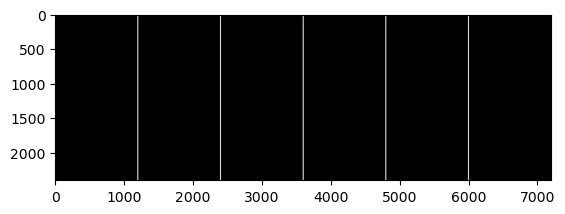

In [49]:
## Gradiente morfológico
bordes=dilation(np_gray,square(10))-erosion(np_gray,square(20))
plt.imshow(bordes, cmap='gray')

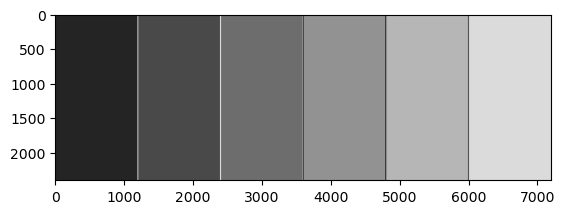

In [50]:
plt.imshow(np_gray+(100*bordes), cmap='gray')

## 3.Detectar y representar los bordes con el operador de laplaciana

In [51]:
float_gray = np.array(img_gray, dtype='float')
float_gray = float_gray/float_gray.max()

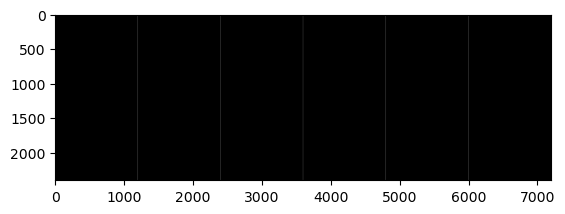

In [52]:
gray_lpl = laplace(float_gray)
gray_lpl_abs=np.absolute(gray_lpl)
plt.imshow(gray_lpl_abs, cmap='gray')

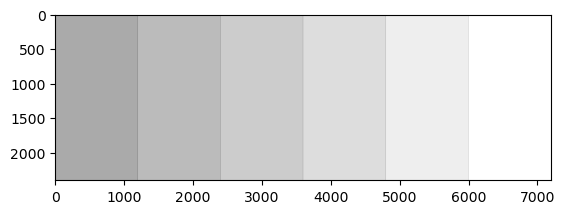

In [53]:
alpha=10#Cambiar valor de alpha para ver efecto
img_realz = float_gray-alpha*gray_lpl_abs

plt.imshow(img_realz, cmap='gray')

## 4.Añadir ruido gaussiano a la imagen, de media cero y de desviación típica configurable

Text(0.5, 1.0, 'Con ruido')

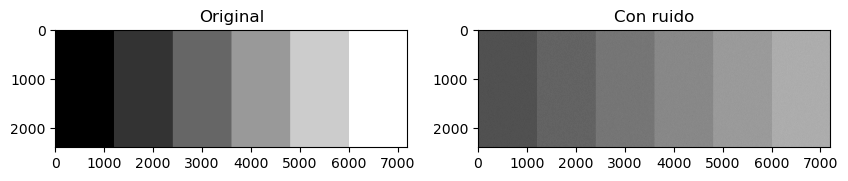

In [54]:
desv_tip=0.15

gaussian_noise = np.random.normal(0, desv_tip, float_gray.shape)
img_noised=float_gray + gaussian_noise

plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(img_gray, cmap='gray')
plt.title('Original')

plt.subplot(122)
plt.imshow(img_noised, cmap='gray')
plt.title('Con ruido')


## 5.Aplicar los operadores de gradiente y laplaciana a las imágenes ruidosas

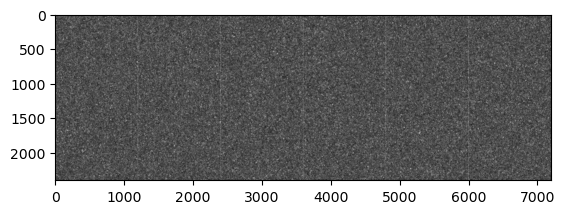

In [55]:
## Gradiente morfológico
#img_noised = np.array(img_noised)
bordes=dilation(img_noised,square(10))-erosion(img_noised,square(20))
plt.imshow(bordes, cmap='gray')

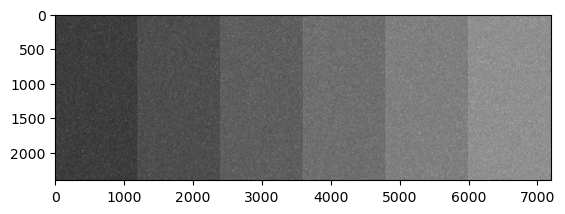

In [56]:
plt.imshow(img_noised+bordes, cmap='gray')

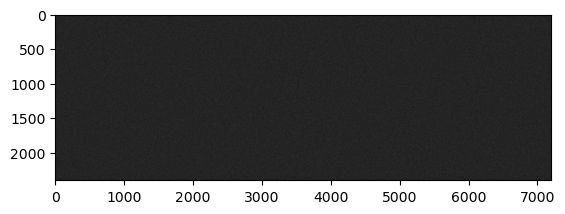

In [57]:
#Laplaciana
float_noised = np.array(img_noised, dtype='float')
float_noised = float_noised/float_noised.max()

noised_lpl = laplace(float_noised)
noised_lpl_abs=np.absolute(noised_lpl)
plt.imshow(noised_lpl_abs, cmap='gray')

En las imagenes ruidosas los bordes no se aprecian al aplicar los operadores 

## 6.Aplicar un filtrado Gaussiano a la imagen antes de aplicar los operadores

Text(0.5, 1.0, 'Filtro gaussiano con desviación típica: 1')

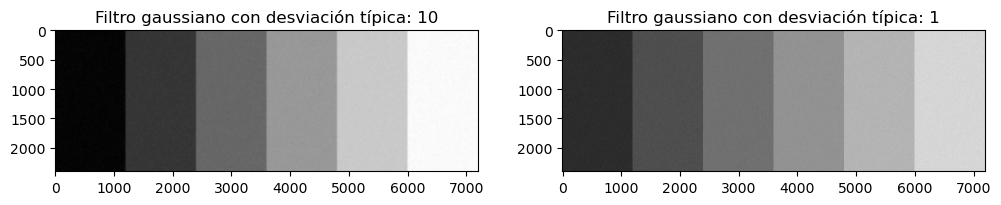

In [58]:
plt.figure(figsize=(12, 6))

img_gaussian10 = gaussian_filter(img_noised, 10)
plt.subplot(121) 
plt.imshow(img_gaussian10, cmap='gray')
plt.title('Filtro gaussiano con desviación típica: 10')

img_gaussian1 = gaussian_filter(img_noised, 1)
plt.subplot(122)
plt.imshow(img_gaussian1, cmap='gray')
plt.title('Filtro gaussiano con desviación típica: 1')

Text(0.5, 1.0, 'G. mofologico sobre f. gaussiano con desviación típica: 1')

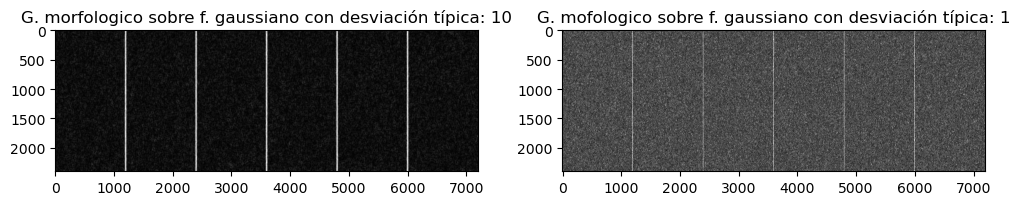

In [59]:
## Gradiente morfológico
#img_noised = np.array(img_noised)

plt.figure(figsize=(12, 6))

bordes_des10=dilation(img_gaussian10,square(10))-erosion(img_gaussian10,square(20))
plt.subplot(121) 
plt.imshow(bordes_des10, cmap='gray')
plt.title('G. morfologico sobre f. gaussiano con desviación típica: 10')

bordes_des1=dilation(img_gaussian1,square(10))-erosion(img_gaussian1,square(20))
plt.subplot(122) 
plt.imshow(bordes_des1, cmap='gray')
plt.title('G. mofologico sobre f. gaussiano con desviación típica: 1')

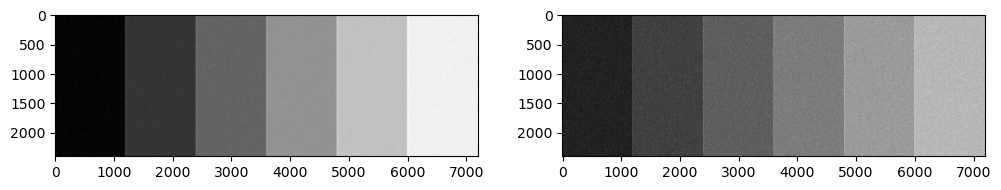

In [60]:
plt.figure(figsize=(12, 6))

plt.subplot(121) 
plt.imshow(img_gaussian10+bordes_des10, cmap='gray')

plt.subplot(122) 
plt.imshow(img_gaussian1+bordes_des1, cmap='gray')

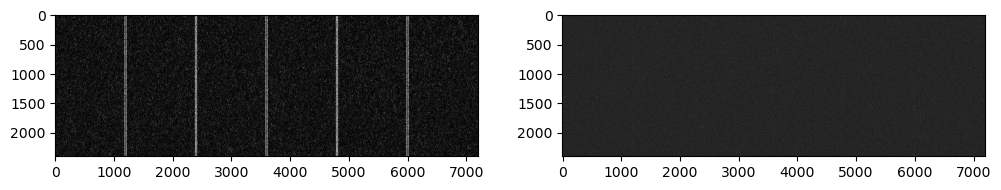

In [61]:
#Laplaciana

plt.figure(figsize=(12, 6))

plt.subplot(121) 
float_gaussian10 = np.array(img_gaussian10, dtype='float')
float_gaussian10 = float_gaussian10/float_gaussian10.max()

gaussian10_lpl = laplace(float_gaussian10)
gaussian10_lpl_abs=np.absolute(gaussian10_lpl)
plt.imshow(gaussian10_lpl_abs, cmap='gray')

plt.subplot(122) 
float_gaussian1 = np.array(img_gaussian1, dtype='float')
float_gaussian1 = float_gaussian1/float_gaussian1.max()

gaussian1_lpl = laplace(float_gaussian1)
gaussian1_lpl_abs=np.absolute(gaussian1_lpl)
plt.imshow(gaussian1_lpl_abs, cmap='gray')

Al aplicar un filtrado Gaussiano a la imagen antes de aplicar los operadores se puede conseguir ver mejor los bordes si se usa la adecuada desviación típica, en el caso de la imagen utilizada con una desviación tipica de 10 si se distinguen los bordes mientras que con una desviación típica de 1 no se diferencian.

## 7.Detección de bordes con el detector de Canny

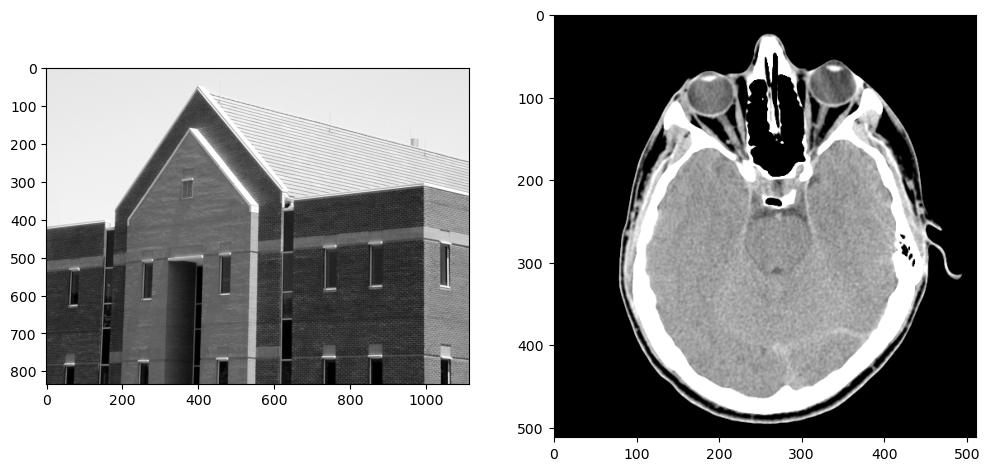

In [62]:
file = 'images/building.tif'

plt.figure(figsize=(12, 6))

plt.subplot(121)
img_building = Image.open(file)
plt.imshow(img_building,cmap='gray')

file = 'images/head_CT.tif'

plt.subplot(122)
img_head = Image.open(file)
plt.imshow(img_head,cmap='gray')



In [67]:
# Compute the Canny filter for two values of sigma

img_building= np.array(img_building, dtype='float')
edges1 = feature.canny(img_building)
edges2 = feature.canny(img_building, sigma=3)

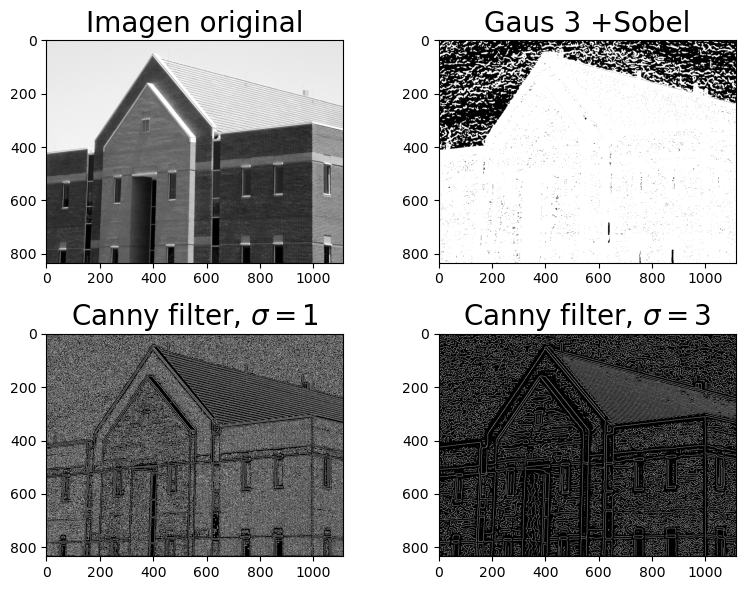

In [68]:
plt.figure(figsize=(8, 6))

plt.subplot(221)
plt.imshow(img_building, cmap='gray')
plt.title('Imagen original', fontsize=20)

plt.subplot(222)
plt.imshow(np.logical_not(filters.sobel(gaussian_filter(img_building,3))<0.1), cmap='gray')
plt.title('Gaus 3 +Sobel', fontsize=20)

plt.subplot(223)
plt.imshow(edges1, cmap='gray')
plt.title(r'Canny filter, $\sigma=1$', fontsize=20)

plt.subplot(224)
plt.imshow(edges2, cmap='gray')
plt.title(r'Canny filter, $\sigma=3$', fontsize=20)

plt.tight_layout()
plt.show()

In [69]:
# Compute the Canny filter for two values of sigma

img_head= np.array(img_head, dtype='float')
edges1 = feature.canny(img_head)
edges2 = feature.canny(img_head, sigma=2)

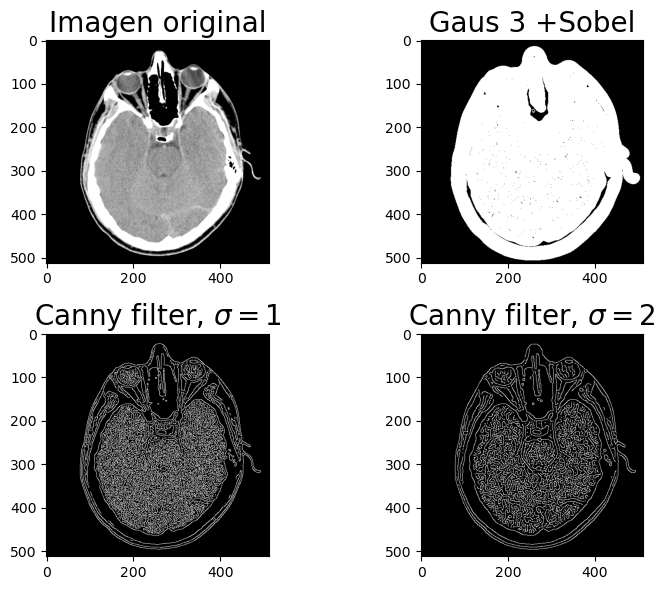

In [70]:
plt.figure(figsize=(8, 6))

plt.subplot(221)
plt.imshow(img_head, cmap='gray')
plt.title('Imagen original', fontsize=20)

plt.subplot(222)
plt.imshow(np.logical_not(filters.sobel(gaussian_filter(img_head,3))<0.1), cmap='gray')
plt.title('Gaus 3 +Sobel', fontsize=20)

plt.subplot(223)
plt.imshow(edges1, cmap='gray')
plt.title(r'Canny filter, $\sigma=1$', fontsize=20)


plt.subplot(224)
plt.imshow(edges2, cmap='gray')
plt.title(r'Canny filter, $\sigma=2$', fontsize=20)

plt.tight_layout()
plt.show()

Aplicando este detector los bordes se ven mucho más claros, aunque en la segunda imagen a mi parecer se aprecian aun mejor ya que no tienee tanto ruido la imagen.